# День второй - анализ данных

В сегодняшнем дне мы погрузимся в аналитику данных как таковую, и нас ждут следующие блоки:
- библиотеки работы с данными numpy, pandas, pyplot, seaborn, ipywidgets,
- понятие разведочного анализа и предобработки признаков. поймем, почему нельзя полагаться только на выборочные статистики как числа,
- линейные модели и градиентный спуск,
- деревья решений и ансамбли моделей на основе деревьев решений,
- алгоритм ближайших соседей и соседство как таковое (весьма важно на практике), в том числе на примерах текстовых данных,
- (пока) поверхностно: нейронные сети в библиотеке `scikit-learn`.

## 2.1 Библиотеки работы с данными
### Библиотеки numpy и pandas

Библиотека `numpy` предназначена для работы с многомерными массивами. Мы уже видели примеры в первом дне, как ей можно пользоваться, теперь чуть-чуть поподробнее на примерах.

In [1]:
# запретим предупреждения
import warnings
warnings.filterwarnings('ignore')

import numpy as np # общепринятое сокращение

# создадим первый numpy-массив.
# каждый элемент первого уровня содержит другой массив... 
# второй уровень - числа

array = np.array([[1, 2], [3, 4]])
array

array([[1, 2],
       [3, 4]])

In [2]:
# с массивами numpy можно проделывать различные операции одновременно надо всеми элементами

# в квадрат и минус 1
array ** 2 - 1

array([[ 0,  3],
       [ 8, 15]], dtype=int32)

In [3]:
# все массивы numpy должны иметь одинаковый тип элементов

array.dtype, array.astype(float).dtype

(dtype('int32'), dtype('float64'))

In [4]:
# библиотека numpy содержит множество полезных функций

np.log(np.e), np.allclose(0, np.sin(np.pi))

(1.0, True)

In [5]:
# массивы numpy можно индексировать вот так

# первая строка, вторая колонка
array[0, 1]

2

In [6]:
# вся вторая колонка
array[:, 1], "эквивалентно", array[None:None, 1]

(array([2, 4]), 'эквивалентно', array([2, 4]))

In [7]:
# есть полезные операции над массивами, например среднее

# среднее по всем элементам, среднее по каждому столбцу (по вертикали), среднее по каждой строке (по горизонтали)
array.mean(), array.mean(axis=0), array.mean(axis=1)

(2.5, array([2., 3.]), array([1.5, 3.5]))

In [8]:
# преобразовать размерность массива
# - первое - чтобы была одна колонка
# - второе - чтобы была одна строка

array.reshape(-1, 1), array.reshape(1, -1)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[1, 2, 3, 4]]))

Нам часто будет нужен метод `.reshape`, так как он может полезен при конвертации данных в массивы, пригодные для обучения моделей. Если на одной какой-то оси стоит -1, то количество элементов на ней будет рассчитано автоматически. Так например, `.reshape(-1, number_of_features)` - сделает массив с количеством примеров, каждая строка которого - список признаков.

По сути, массивы `numpy` - это те же "числа", с точки зрения операций. Однако благодаря еще наличию в них структуры - набор этих операций шире.

Далее. Библиотека `pandas` в свою очередь предназначена для работы с табличными данными, и колонки таблицы могут иметь разный тип. Давайте рассмотрим датасет, на котором мы будем дальше часто тренироваться - датасет `Abalone` (ракушки).

Это датасет физических замеров ракушек, с различными признаками. Нужно предсказывать возраст ракушки по физическим параметрам. Делается это путем подсчета колец, но это достаточно долгая и нудная процедура, причем с применением микроскопа - да и ракушку надо пилить. Добавив 1.5 к количеству колец (зависит правда от локации) - обычно получают возраст.

Мы будем по-разному формулировать задачи с этим датасетом, но пока это неважно. Давайте на него посмотрим.

In [9]:
# подключим pandas с общепринятым сокращением
import pandas as pd

dataframe = pd.read_csv(
    'data/abalone.csv', 
    sep=',', # что является разделителем колонок в файле,
    decimal='.', # что является разделителем десятичных дробей в записи чисел
    parse_dates=[], # мы знаем, что дат у нас нет, если бы они были, здесь можно было бы перечислить колонки
    header=0 # названия колонок в первой строке
)

# посмотрим на случайные 15 записей
dataframe.sample(15)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
4154,I,0.435,0.330,0.095,0.3930,0.2190,0.0750,0.0885,6
359,F,0.685,0.545,0.180,1.7680,0.7495,0.3920,0.4850,16
3004,F,0.670,0.515,0.170,1.4265,0.6605,0.3395,0.3700,11
777,M,0.490,0.380,0.140,0.6385,0.2305,0.1420,0.1950,13
2750,I,0.510,0.385,0.145,0.7665,0.3985,0.1400,0.1805,8
2780,M,0.590,0.475,0.140,0.9770,0.4625,0.2025,0.2750,10
2711,I,0.190,0.140,0.030,0.0315,0.0125,0.0050,0.0105,3
1348,M,0.590,0.470,0.180,1.1870,0.5985,0.2270,0.3100,9
3473,I,0.210,0.150,0.055,0.0455,0.0200,0.0065,0.0130,4
1777,I,0.485,0.345,0.160,0.8690,0.3085,0.1850,0.3190,9


Здесь у нас есть поля пола (M - мужской, F - женский и I - дети), есть поля длины, диаметра, высоты - в мм, четыре разных веса (полный и веса по составляющим) в граммах, и количество колец (целое число).

Давайте посмотрим, как можно работать с такой таблицей.

In [10]:
# описательные статистики для числовых полей

dataframe.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# количество ракушек разных полов

dataframe.groupby('sex')['rings'].count()

sex
F    1307
I    1342
M    1528
Name: rings, dtype: int64

In [12]:
# количество ракушек по полам, в случае если диаметр ракушки больше среднего

dataframe[dataframe.diameter > dataframe.diameter.mean()].groupby('sex')['rings'].count()

sex
F     988
I     256
M    1070
Name: rings, dtype: int64

Уже сейчас по числам видно, что маленький диаметр ракушки - это преимущественно дети.

In [13]:
# срез данных по колонкам и строкам
# первая и последние колонки и последние три строки

dataframe[['sex', 'rings']][-3:]

,sex,rings
4174,M,9
4175,F,10
4176,M,12


In [14]:
# сортировка датасета - и посмотрим максимальный
# .values - это получить колонку как numpy-массив

dataframe.sort_values('rings').rings.values[-1] # ракушка-старожил

29

In [15]:
# каждый датафрейм (объект таблицы) имеет индекс

dataframe.index[:4:2]

RangeIndex(start=0, stop=4, step=2)

In [16]:
# получить записи по индексу таблицы, и выборочно колонки

dataframe.loc[dataframe.index[:4:2]][dataframe.columns[:3]]

,sex,length,diameter
0,M,0.455,0.365
2,F,0.530,0.420


Таблицы `pandas` можно так же склеивать (по горизонтали и вертикали), делать агрегированные (сводные) таблицы, и многое другое.

### Библиотеки визуализации

Мы посмотрим на две - первая это `matplotlib` - универсальная, вторая, это надстройка над ней под названием `seaborn` - очень удобная для визуализации в статистических исследованиях.

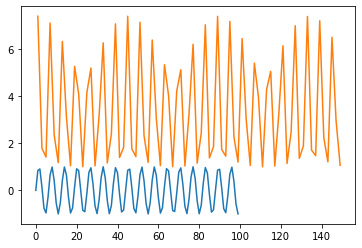

In [17]:
%matplotlib inline
# важная строка, если надо чтобы диаграммы выводились в тетрадке
# она должна быть раньше всех, прежде чем что-то рисовать

import matplotlib.pyplot as plt # тоже общепринятое сокращение

# наша первая линейная диаграмма
plt.plot(np.sin(range(100))); # точка с запятой нужна, чтобы не выводить в тетрадку запись об объекте

# наша вторая диаграмма, она наложится
plt.plot(range(1, 151, 2), np.exp(np.cos(range(0, 150, 2)) + 1));

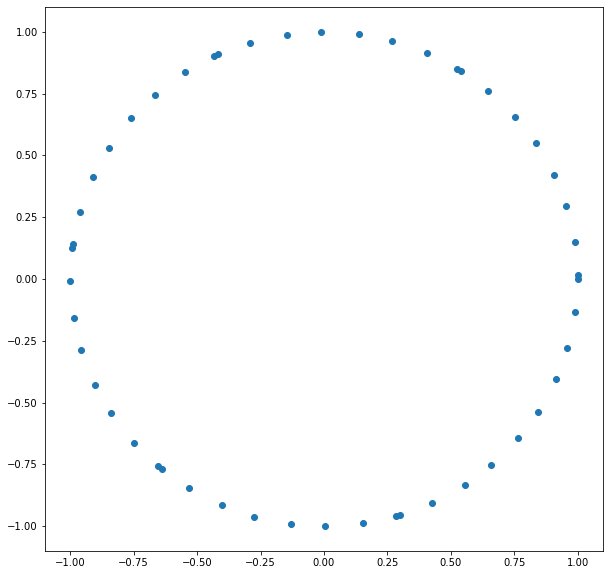

In [18]:
# на тот случай, если мы хотим изображение больше
plt.figure(figsize=(10, 10)) # длина и высота... в дюймах!

# точечная диаграмма
plt.scatter(np.cos(range(50)), np.sin(range(50)));

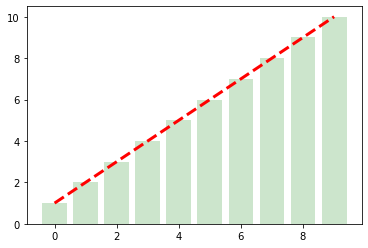

In [19]:
# диаграммы можно накладывать друг на друга даже когда они разных типов

plt.bar(
    range(10), # значения на оси абсцис
    np.linspace(1, 10, 10), # высота столбцов
    color='green', # понятно, цвет
    alpha=0.2 # прозрачность
);

plt.plot(
    range(10), # значения x
    np.linspace(1, 10, 10), # значения y
    color='red', # тут тоже понятно
    ls='--', # стиль линии
    lw=3 # ширина линии
);

Библиотека `seaborn` содержит очень много полезных способов визуализации данных, лучше всего их посмотреть в галерее библиотеки. Нас же будут интересовать три:
1. Как построить график распределения какой-либо величины,
2. Попарные точечные диаграммы,
3. График серий.

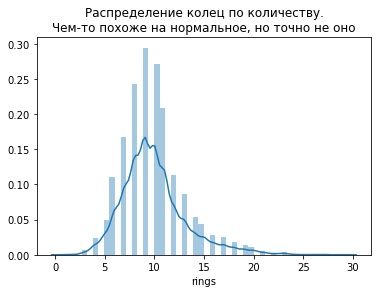

In [20]:
# посмотрим на распределение колец ракушек
import seaborn as sns

plt.title("Распределение колец по количеству.\nЧем-то похоже на нормальное, но точно не оно")
sns.distplot(dataframe.rings);

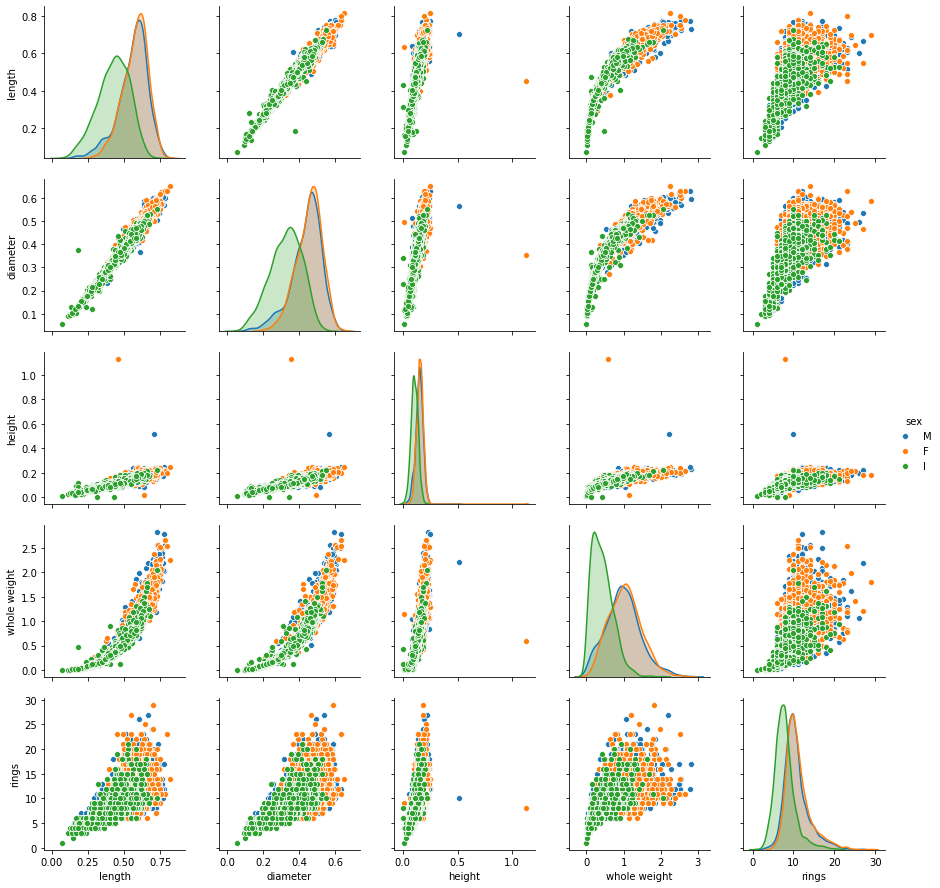

In [21]:
# попарные точечных диаграммы

sns.pairplot(data=dataframe[['length', 'diameter', 'height', 'whole weight', 'rings', 'sex']], hue='sex');

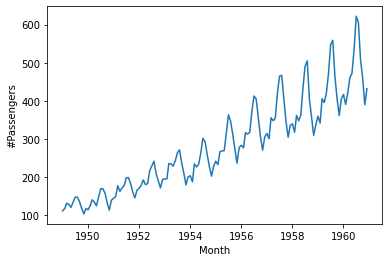

In [22]:
# и наконец, диаграмма серий (пример с датами)

airpassengers = pd.read_csv('data/airpassengers.csv', parse_dates=['Month'])
sns.lineplot(x="Month", y="#Passengers", data=airpassengers);

### А теперь - интерактив!

Досточно легко сделаем наши диаграммы интерактивными в ноутбуках с помощью `ipywidgets`.

In [23]:
from ipywidgets import interact

def draw_function(length):
    sns.lineplot(x="Month", y="#Passengers", data=airpassengers[:length]);
    
interact(
    draw_function,
    length=(
        12, # минимальное значение
        len(airpassengers), # максимальное
        12 # шаг
    )
);

interactive(children=(IntSlider(value=72, description='length', max=144, min=12, step=12), Output()), _dom_cla…

В библиотеке `ipywidgets` много всяких полезностей, тем не менее подробно мы на них не будем останавливаться. Метод `interact` автоматически распознаёт тип переменной, и подставит - для строки поле ввода текста, для числа с плавающей запятой - слайдер, и так далее.

## 2.2 Разведочный анализ и препроцессинг

Разведочный анализ, или *понимание данных* - важный этап, который может сократить большое количество времени. Давайте сразу посмотрим на квартет Энскомба (Anscombe's quartet). Это четыре набора данных, каждый из которых линейно аппроксимируется одинаково.

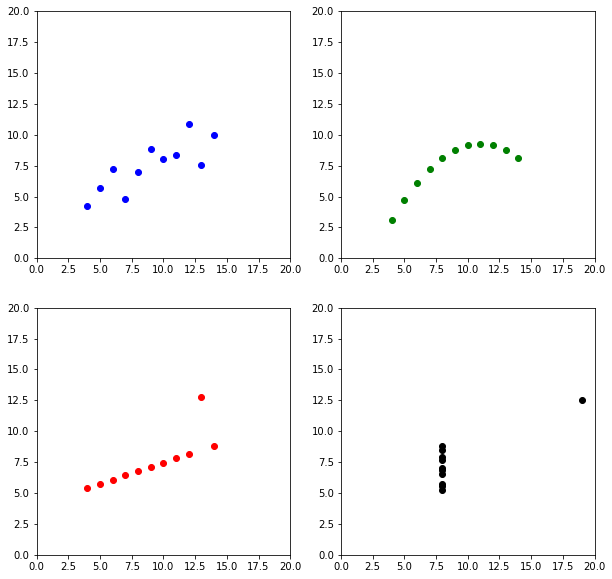

In [24]:
quartet = pd.read_csv('data/anscombes.csv').drop('id', axis='columns')

plt.figure(figsize=(10, 10))
for index, dataset in enumerate(['I', 'II', 'III', 'IV']):
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        quartet[quartet.dataset == dataset].x,
        quartet[quartet.dataset == dataset].y,
        c=['blue', 'green', 'red', 'black'][index]
    );
    plt.xlim(0, 20);
    plt.ylim(0, 20);

Это четыре разных датасета, но посмотрим их статистики.

In [25]:
quartet.groupby('dataset').describe().T 

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

> Как видим, количество, среднее и разброс у всех наборов одинаковый! В частности, линейные алгоритмы только на это и полагаются. Поэтому очень ВАЖНО смотреть попарные диаграмми **глазами**. 

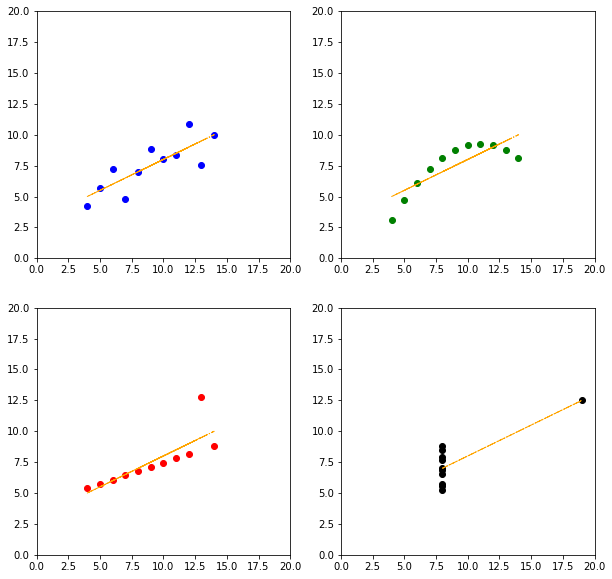

In [26]:
from sklearn.linear_model import LinearRegression

coefs = []

plt.figure(figsize=(10, 10))
for index, dataset in enumerate(['I', 'II', 'III', 'IV']):
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        quartet[quartet.dataset == dataset].x,
        quartet[quartet.dataset == dataset].y,
        c=['blue', 'green', 'red', 'black'][index]
    );
    model = LinearRegression().fit(
        quartet[quartet.dataset == dataset].x.values.reshape(-1, 1),
        quartet[quartet.dataset == dataset].y
    ) # y = kx + b
    coefs.append([
        model.coef_[0], # это k
        model.intercept_ # это b
    ])
    line = model.predict(quartet[
        quartet.dataset == dataset
    ].x.values.reshape(-1, 1))
    plt.plot(
        quartet[quartet.dataset == dataset].x,
        line,
        ls='-.',
        c='orange',
        lw=1
    )
    plt.xlim(0, 20);
    plt.ylim(0, 20);

In [27]:
np.array(coefs)[:, 0], np.array(coefs)[:, 1]

(array([0.50009091, 0.5       , 0.49972727, 0.49990909]),
 array([3.00009091, 3.00090909, 3.00245455, 3.00172727]))

**Коэффициенты практически одинаковые**.

Так что же представляет собой разведочный анализ? Давайте остановися на том, что это не просто подсчет описательных статистик (сколько, среднее, разброс), но и построение диаграмм, на которых можно уловить какие-то зависимости, возможно даже глазами.

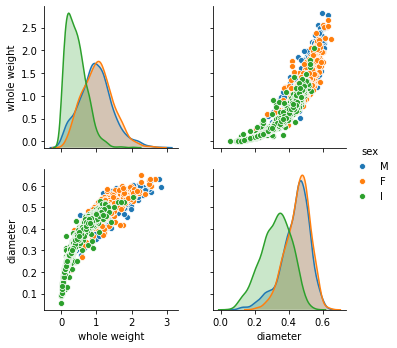

In [28]:
sns.pairplot(dataframe[['whole weight', 'diameter', 'sex']], hue='sex');

Здесь мы видим некоторую изогнутую зависимость между весом ракушки и её диаметром. Может она степенная? Мы можем предположить, что извлечение квадратного корня "исправит ситуацию", и может превратить зависимость в линейную. Проверим хотя бы визуально, без метрик.

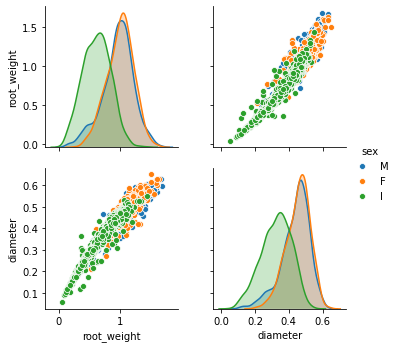

In [29]:
dataframe_copy = dataframe.copy()
dataframe_copy['root_weight'] = np.sqrt(dataframe_copy['whole weight'])
sns.pairplot(dataframe_copy[['root_weight', 'diameter', 'sex']], hue='sex');

Как видим, мы слегка "выпрямили" зависимость, хотя и не до конца (это означает что степень на самом деле еще меньше одной второй). А то, что мы процедурно сделали, называется `feature engineering` - преобразование признаков, с целью подогнать данные под линейную модель (которая хорошо работает с прямолинейными зависимостями).

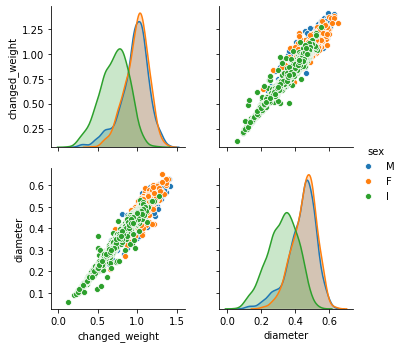

In [30]:
# попробуем с третьей степенью

dataframe_copy['changed_weight'] = np.power(dataframe_copy['whole weight'], 1 / 3)
sns.pairplot(dataframe_copy[['changed_weight', 'diameter', 'sex']], hue='sex');

Можно сказать угадали. Но на самом деле, эти **подсказки могут давать не только сами данные, но и их практический смысл**. В данном случае, вес ракушки пропорционален диаметру в третьей степени. Почему? Потому что вес пропорционален объему, а объем (например шара) - пропорционален третьей степени диаметра.

Поэтому `feature engineering` полагается скорее на зависимости в данных, которые известны (или их можно предположить) независимо от этих самых данных.

> Забегая вперед - нейросети часто могут сами делать `feature engineering`. Поэтому они получили такую популярность. Но нам надо и без этого самим уметь!

**Препроцессинг** - это в свою очередь преобразование данных в вид, который признаёт алгоритм, и обычно это двумерный массив (матрица) значений, где каждая строка - пример, а значения строки - значения признаков. 

В случае с квартетом Энскомба мы этого достигли преобразованием `.reshape(-1, 1)`, где количество признаков это `1`, а `-1` - это количество примеров (мы могли подставить туда их точное количество, но для одной оси в `reshape` можно поставить и -1, тогда оно само подсчитается).

Препроцессинг этим не ограничивается. Что если мы хотим использовать *категориальный* признак? Например, пол ракушки? Алгоритмы ничего кроме чисел не понимают. Поэтомы мы должны привести их к числам, но не просто по порядку - порядок полов в данных же не важен, а *векторизовать*.

То есть мужскому полу сопоставить вектор `(1, 0, 0)`, женскому `(0, 1, 0)`, а детскому соответственно `(0, 0, 1)`, и вместо одного признака для модели, у нас будет их три.

In [31]:
# всё это можно сделать функцией pandas get_dummies

processed_data = pd.get_dummies(dataframe['sex'])
processed_data.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [32]:
# чтобы две таблицы склеить по индексу, можно использовать такой код

number_data = processed_data.join(dataframe).drop('sex', axis='columns')
number_data.head()

,F,I,M,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


И теперь у нас готовые численные данные, которые можно отдавать в алгоритмы. А какие - об этом прямо сейчас.

## 2.3 Линейные модели и градиентный спуск

Линейные модели просты и интерпретируемы, и поэтому чрезвычайно распространены. И при подходящей предобработке признаков - весьма универсальны. Отклик по линейному алгоритму моделируется как линейная комбинация `m` признаков с некоторыми коэффициентами и плюс сдвиг:

$$y = \sum k_i x_i + b$$

Всё. Нет, не всё. Существует аналитическое решение (то есть формульно), как найти `k1, ... km, b` такие, чтобы ошибка (конкретно среднее квадратичное отклонение модели от данных) было минимальным. Мы же для целей иллюстрации рассмотрим алгоритм *градиентного спуска*, который применяется во множестве моделях, нейросетях в частности в различных модификациях.

Смысл всего этого такой. Чтобы найти минимум ошибки, 
1. надо взять производную от этой самой ошибки по коэффициентам,
2. Далее двигаться в направлении уменьшения ошибки, изменяя случайно инициализированные коэффициенты на минус производную (то есть в сторону убывания ошибки),
3. И так сколько раз, сколько захотим (или пока ошибка не начнет меняться очень слабо).

Например, если у нас 
$y = kx + b$, а ошибка $$e = \frac {\sum (y - (kx - b))^2} {n},$$
то производная ошибки по `k` будет равна
$$e'_k = -2 \frac {\sum(x (y - kx - b))} {n},$$
а для `b`: 
$$e'_b = -2 \frac {\sum(kx - y - b)} {n}.$$

На деле же, существуют фреймворки (библиотеки), которые подобное дифференцирование делают за нас: `tensorflow`, `pytorch`. Их обычно используют для нейросетей. Но тут мы сделаем всё сами, чтобы убедиться, что всё это работает.

In [33]:
def update(x, y, k, b, alpha):
    number = len(y)
    
    # подсчитаем производные по коэффициентам
    change_k = -2 * sum([
        x[index] * (y[index] - k * x[index] - b) for index in range(number)
    ])
    change_b = -2 * sum([
        x[index] * k - y[index] - b for index in range(number)
    ])
    
    # параметр alpha - называется скорость обучения
    new_k = k - alpha * change_k / number 
    new_b = b - alpha * change_b / number 
    
    return new_k, new_b

def train_linear(x, y, alpha=0.1, epochs=50):
    # инициализируем случайно наши коэффициенты модели
    k, b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
    
    for epoch in range(epochs):
        k, b = update(x, y, k, b, alpha)
        
        if epoch % 10 == 0 and epoch > 0: # каждый десятый шаг
            print("%0d: среднее абсолютное отклонение численно составляет %.4f" % (
                epoch,
                np.mean(np.abs(y - k*x - b))
            ))
    
    return k, b

In [34]:
%%time

from sklearn.utils import shuffle

random_indices = shuffle(range(len(dataframe)), random_state=1)
train_indices = random_indices[:-300] # 300 точек - будет тест
test_indices = random_indices[-300:]

k, b = train_linear(
    dataframe['length'].values[train_indices],
    dataframe['diameter'].values[train_indices]
)

10: среднее абсолютное отклонение численно составляет 0.3284
20: среднее абсолютное отклонение численно составляет 0.1259
30: среднее абсолютное отклонение численно составляет 0.0204
40: среднее абсолютное отклонение численно составляет 0.0127


Wall time: 341 ms


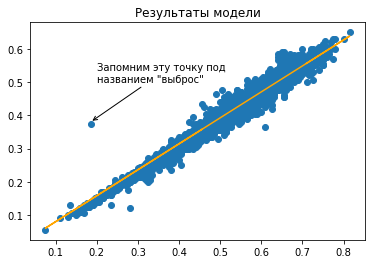

In [35]:
plt.title('Результаты модели');
plt.scatter(dataframe['length'], dataframe['diameter']);
plt.plot(dataframe['length'], k * dataframe['length'] + b, c='orange');
plt.annotate("Запомним эту точку под\nназванием \"выброс\"", (0.185, 0.38), (0.2, 0.5), arrowprops={"arrowstyle": '->'});

> Congratulations!!

Паззлы сошлись, наша прямая подошла к данным. Замечательнейшая библиотека `scikit-learn` имеет множество вариаций линейных моделей в арсенале. И мы рассмотрим модели линейной регрессии и модель `Ridge`. Линейная модель - минимизирует средний квадрат отклонений предсказанного от истинного и может быть решена алгебраически (то есть без итераций, и работает поэтому быстро). `Ridge` (гребневая регрессия) отличается тем, что *штрафует* модель за абсолютную величину коэффициентов, это часто позволяет избегать переобучения. 

Учтите, что на линейные модели влияют выбросы в данных. Выбросы - это редкие точки, которые сильно отличаются от поведения всех остальных. Часто при препроцессинге их просто удаляют из датасета. Здесь "плотность" точек очень высокая, и влияние выбросов небольшое. Для иллюстрации, возьмем только вторую четверть датасета.

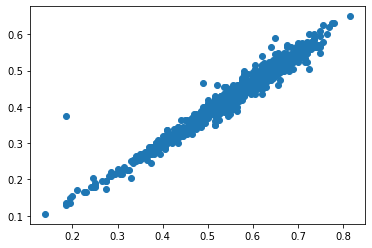

In [36]:
sliced = slice(len(train_indices) // 4, len(train_indices) // 2)
plt.scatter(dataframe['length'][sliced], dataframe['diameter'][sliced]);

10: среднее абсолютное отклонение численно составляет 0.4691
20: среднее абсолютное отклонение численно составляет 0.0862
30: среднее абсолютное отклонение численно составляет 0.0128
40: среднее абсолютное отклонение численно составляет 0.0145


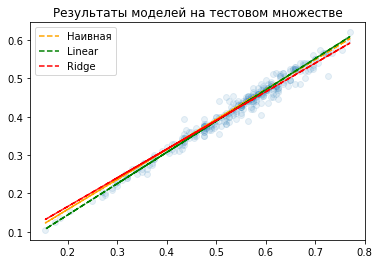

In [37]:
from sklearn.linear_model import LinearRegression, Ridge

linear_model = LinearRegression().fit(
    dataframe.length.values[train_indices][sliced].reshape(-1, 1),
    dataframe.diameter[train_indices][sliced].values
)

ridge_model = Ridge(
    # это настройка штрафа, чем она выше, тем сильнее регуляризация
    alpha=1.25
).fit(
    dataframe.length.values[train_indices][sliced].reshape(-1, 1),
    dataframe.diameter[train_indices][sliced].values
)

k, b = train_linear(
    dataframe['length'].values[train_indices][sliced],
    dataframe['diameter'].values[train_indices][sliced]
)

# а предскажем - на тестовом
linear_predictions = linear_model.predict(
    dataframe.length.values[test_indices].reshape(-1, 1)
)

ridge_predictions = ridge_model.predict(
    dataframe.length.values[test_indices].reshape(-1, 1)
)

plt.title('Результаты моделей на тестовом множестве');
plt.scatter(dataframe['length'].values[test_indices], dataframe['diameter'].values[test_indices], alpha=0.1);
plt.plot(dataframe['length'].values[test_indices], k * dataframe['length'].values[test_indices] + b, ls='--', c='orange', label="Наивная");
plt.plot(dataframe['length'].values[test_indices], linear_predictions, c='green', ls='--', label="Linear");
plt.plot(dataframe['length'].values[test_indices], ridge_predictions, c='red', ls='--', label="Ridge");
plt.legend(loc='best');

Как видим, наша модель отличается. Давайте проверим метрику `R-квадрат` на отложенном тесте. Это самая распространенная метрика для задачи регрессии. Она всегда меньше либо равна единице, чем ближе к единице - тем лучше предсказания модели совпадают с истинными значениями. Если она равна нулю, то предсказание идёт средним значением целевой величины (ниже нуля - еще хуже).

In [38]:
from sklearn.metrics import r2_score

print("Наивная модель на тестовом множестве %.5f, Linear и Ridge (там же): %.5f, %.5f" % (
    r2_score(dataframe.diameter.values[test_indices], k * dataframe['length'].values[test_indices] + b),
    r2_score(dataframe.diameter.values[test_indices], linear_predictions),
    r2_score(dataframe.diameter.values[test_indices], ridge_predictions)
))

Наивная модель на тестовом множестве 0.97264, Linear и Ridge (там же): 0.97425, 0.97177


Как видим, качество отличается в третьем знаке после запятой. Нам тут сильно повезло с данными... :) А давайте посмотрим, как можно решить задачу классификации с помощью линейной модели.

Наша модель будет иметь вид

$$y = \sigma (\sum k_i x_i + b)$$

где $\sigma$ (*sigmoid*), это следующая функция

$$\sigma(x) = \frac {1} {1 + e^{-x}}.$$

Она всегда от 0 до 1 невключительно. Её можно интерпретировать как *вероятность* того, что пример с признаками `x1, ..., xm` относится к классу 1 (а не 0). В `scikit-learn` модель заведена под названием `LogisticRegression` (это не регрессия, несмотря на название, а классификация).

Попробуем отличить применить логистическую регрессию к датасету Iris.

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# оставим только два последних признака
X = X[:, -2:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1, shuffle=True
)

# создадим модель
logreg = LogisticRegression(random_state=1, multi_class='auto').fit(X_train, y_train)

from sklearn.metrics import accuracy_score # метрика - количество правильных ответов

print("Точность классификации на %d тестовых примерах %.3f" % (
    len(y_test),
    accuracy_score(
        y_test,
        logreg.predict(X_test)
    )
))

Точность классификации на 30 тестовых примерах 0.967


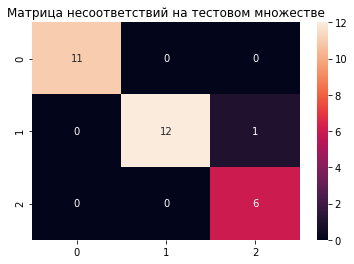

In [40]:
from sklearn.metrics import confusion_matrix 
plt.title("Матрица несоответствий на тестовом множестве")
sns.heatmap(confusion_matrix(
    y_test,
    logreg.predict(X_test)
), annot=True);

Как видим, здесь хороший случай, практически *линейно разделимый*. Посмотрим, как разделились классы на плоскости.

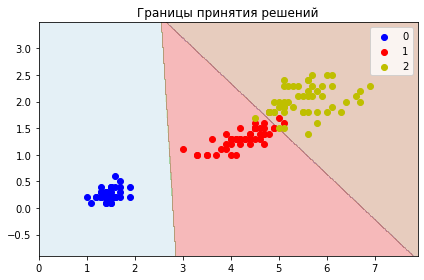

In [41]:
def plot_decisions(x, y, targets, classifier, labels=None):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    c = plt.contourf(xx, yy, z, cmap='Paired', alpha=0.3)
    
    for index in range(len(pd.unique(targets))):
        indices = np.where(targets == index)
        plt.scatter(x[indices], y[indices], color=[
            'b', 'r', 'y'
        ][index], label=labels[index] if labels is not None else index)

    plt.legend()
    plt.tight_layout()
    plt.show()

plt.title('Границы принятия решений');
plot_decisions(
    X[:, 0],
    X[:, 1],
    y,
    logreg
)

### Небольшое заключение

Линейные модели далеко не всегда без подходящего `feature engineering` хорошо работают. А практически - никогда (без изменения признаков). В моделируемых процессах часто очень мало линейного. Далее у нас будет кое-что помощнее!

## 2.4 Деревья решений и ансамбли моделей на их основе

**Дерево решений** - это алгоритм, который строит модели такого вида:

![Tree](media/tree.svg)

При этом дерево может быть любой глубины, но в конечных его узлах (листах) - всегда стоят конкретные значения ***целевой величины*** (числа для регрессии или классы).

Но тут, конечно же, вопрос - откуда берутся промежуточные значения, с которыми сравниваются признаки?

Они выбираются так, чтобы при разбиении на две части, уменьшалась *энтропия* по целевым меткам - это величина, которая тем ближе к единице, чем равномерно случайнее разбросаны в итоге метки, и тем ближе к нулю, чем все метки ближе к единому значению.

То есть если метки разбиты как 50/50 - энтропия 1, если как 0/100 (есть только одна метка) - энтропия 0. 

> Давайте посмотрим как работает одиночное дерево на наших ракушках.

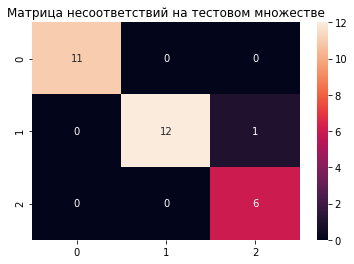

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# деревья by design умеют в мультикласс
decision_tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train).fit(X_train, y_train)

plt.title("Матрица несоответствий на тестовом множестве")
sns.heatmap(confusion_matrix(y_test, decision_tree.predict(X_test)), annot=True);

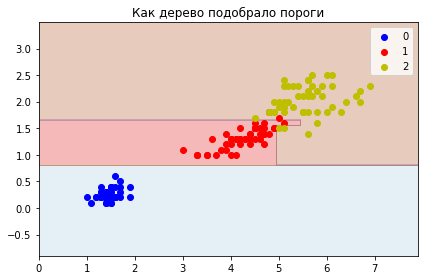

In [43]:
plt.title('Как дерево подобрало пороги');
plot_decisions(
    X[:,0],
    X[:,1],
    y,
    decision_tree
)

> Здесь мы не стали ограничивать дерево по глубине, и видно, что оно "слишком глубоко" погрузилось в данные. 
>
> **Одиночные деревья - всегда переобучаются!**

Для иллюстрации - обрежем по глубине.

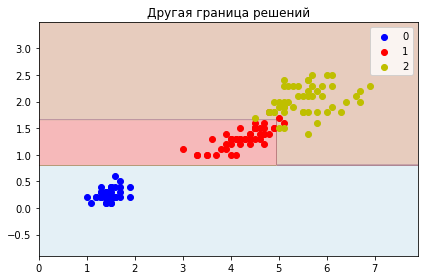

In [44]:
decision_tree_shallow = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3, # максимум 3 вопроса
    random_state=1
).fit(X_train, y_train)

plt.title('Другая граница решений')
plot_decisions(
    X[:,0],
    X[:,1],
    y,
    decision_tree_shallow
)

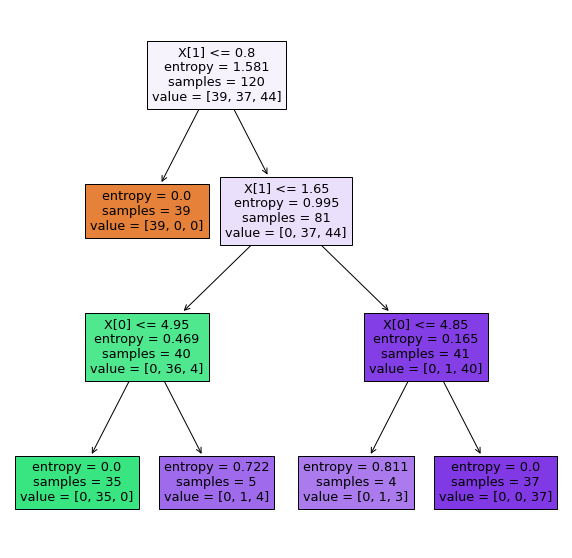

In [45]:
plt.figure(figsize=(10, 10))
plot_tree(decision_tree_shallow, filled=True);

Одиночные деревья - очень интерпретируемые модели, но они редко когда сами по себе полезны. Полезны ***ансамбли деревьев***. 
Рассмотрим два:
1. **Случайный лес решающих деревьев.**

Это множество решающих деревьев, когда каждое дерево обычно строится в полную глубину, но не на всех признаках и не на всех примерах, а на их случайных подмножествах. Ответы полученных деревьев усредняются.

2. **Градиентный бустинг над решающими деревьями.**

Это множество чаще всего неглубоких решающих деревьев, применяемых последовательно, каждое следующее дерево - исправляет ошибки предыдущего.

> Как ни удивительно, эти методы очень хорошо работают.

---

> **ВАЖНО!** Для задач регрессии, по построению деревья не могут выходить за пределы тех _предсказываемых_ значений, которые видели деревья на обучающем множестве!
> 
> Это означает, что если вам надо экстраполировать (величина может выходить за пределы обучающих примеров), деревья не подойдут!

---

In [46]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

boosting = GradientBoostingClassifier(
    n_estimators=10, # количество деревьев
    max_depth=5, # глубина деревьев
    random_state=1
).fit(X_train, y_train)

forest = RandomForestClassifier(
    n_estimators=10,
    random_state=1
).fit(X_train, y_train)

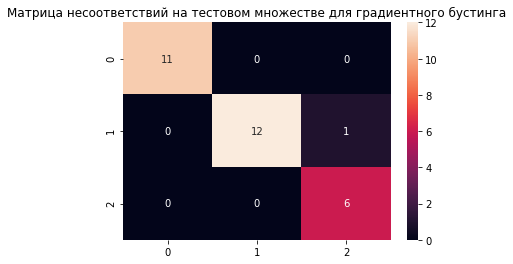

In [47]:
plt.title("Матрица несоответствий на тестовом множестве для градиентного бустинга")
sns.heatmap(confusion_matrix(y_test, boosting.predict(X_test)), annot=True);

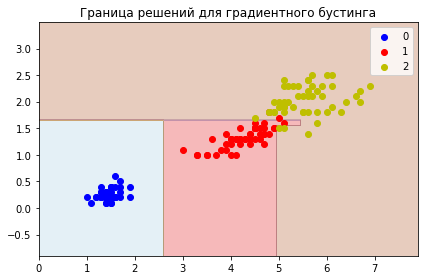

In [48]:
plt.title('Граница решений для градиентного бустинга')
plot_decisions(
    X[:,0],
    X[:,1],
    y,
    boosting
)

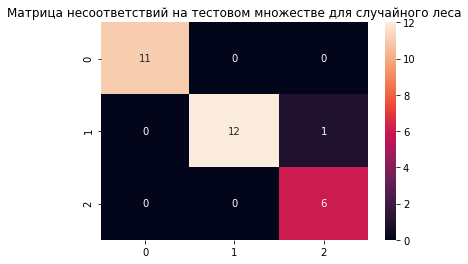

In [49]:
plt.title("Матрица несоответствий на тестовом множестве для случайного леса")
sns.heatmap(confusion_matrix(y_test, forest.predict(X_test)), annot=True);

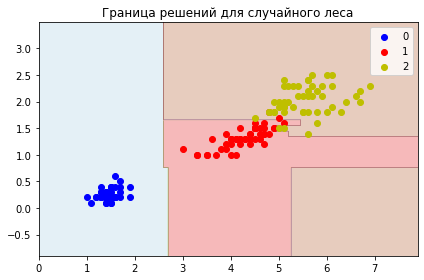

In [50]:
plt.title('Граница решений для случайного леса')
plot_decisions(
    X[:,0],
    X[:,1],
    y,
    forest
)

Как видим, ансамбли работают отлично от одиночного дерева, и от линейных алгоритмов, несмотря на то, что ошибаются одинаково (в одном цветке).

### Заключение

Ансамбли на основе деревьев могут разбирать очень сложные данные. Они часто применяются на практике и дают хорошие результаты. Но никакие деревья не справятся с ситуацией, когда данные слишком запутанные или схожие, или **нет золотого признака**, то есть такого признака, по которому хорошо различается целевая величина.

Если `RandomForest` или `GradientBoosting` для данных - подходящий алгоритм в случае регрессии, то можно так же из них получать прогнозные интервалы. [Для первого можно](https://blog.datadive.net/prediction-intervals-for-random-forests/) обойти все деревья ансамбля (`rf.estimators_`), для каждой точки сделать предсказания каждым деревом и выбрать процентиль (`np.percentile`). Для градиентного бустинга [схема немного другая](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html): там нужно использовать параметры `loss = 'quantile'` и `alpha = 0.5`, где `alpha` - можно регулирует границу интервала от 0 до 1, 0.5 соответствует среднему предсказанию (тому, который обычно отдает бустинг).

## 2.5 Алгоритм ближайших соседей (и немного о текстах)

Мы уже пользовались им на предыдущей лекции. Ближайшие соседи - это, получается, такая *база данных*, которая запоминает правильные ответы, а потом использует ближайшие похожие случаи для предсказания.

Начнем сразу с интерактивного примера на датасете Iris.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# обучим на всём датасете
knn_classifier = KNeighborsClassifier(n_neighbors=3).fit(X, y)

def plot_point(point_x, point_y):
    sort = knn_classifier.predict([[point_x, point_y]])[0]
    
    plt.title("Предсказанный класс %d" % sort);
    plt.scatter(
        X[:, 0].tolist() + [point_x],
        X[:, 1].tolist() + [point_y],
        c=y.tolist() + [sort]
    );
    plt.annotate(
        "Наша точка",
        (point_x, point_y),
        (point_x + 0.25, point_y + 0.25),
        arrowprops={"arrowstyle": '->'}
    );
    
interact(
    plot_point, 
    point_x=(0, 7.5, 0.2),
    point_y=(0, 3.5, 0.2)
);

interactive(children=(FloatSlider(value=3.6, description='point_x', max=7.5, step=0.2), FloatSlider(value=1.6,…

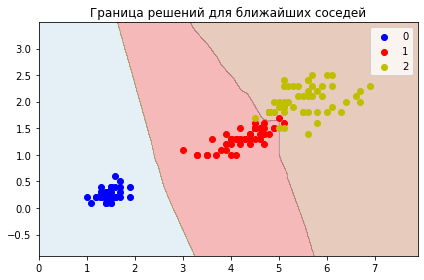

In [52]:
plt.title('Граница решений для ближайших соседей')
plot_decisions(
    X[:,0],
    X[:,1],
    y,
    KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
)

Как оказалось, даже такие простые данные имеют локальные запутанности!

А зачем вообще нужны ближайшие соседи, если они всё запоминают? На самом деле чаще всего важно найти именно одного ближайшего соседа. Давайте рассмотрим пример.

Пусть у нас есть набор текстовых обращений в техническую поддержку какого-нибудь провайдера (например из чата на сайте). 

Провайдер предоставляет услуги ТВ и интернета. Он хотел бы знать, поступившее обращение - оно про ТВ или про Интернет? Чтобы автоматически отправлять его в подходящую группу специалистов.

In [53]:
texts = [
    "Не работает интернет!", "Не работает телевидение", "Проблемы с телевидением", "Интернет сломался"
]

# Импортируем один из самых простых "векторизаторов" текстов
# он укладывает вектора на единичную сферу

from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=3).fit(texts)
space = vectorizer.transform(texts)

print("Вектора текстов")
print(space.todense())

Вектора текстов
[[ 0.4472136   0.          0.89442719]
 [ 0.4472136   0.          0.89442719]
 [-0.70710678  0.70710678  0.        ]
 [ 0.70710678  0.          0.70710678]]


In [54]:
from sklearn.neighbors import NearestNeighbors

# инстанцируем объект, который будет находить ближайшего соседа
nearest = NearestNeighbors(n_neighbors=1).fit(space)

text = "Что-то не так с интернетом"
index = nearest.kneighbors(vectorizer.transform([text]), return_distance=False)[0][0]
print("Ближайший сосед %s: " % text, texts[index])

text = "Что за ерунда с ТВ!"
index = nearest.kneighbors(vectorizer.transform([text]), return_distance=False)[0][0]
print("Ближайший сосед %s: " % text, texts[index])

Ближайший сосед Что-то не так с интернетом:  Не работает интернет!
Ближайший сосед Что за ерунда с ТВ!:  Проблемы с телевидением


В данном случае это очень ограниченный пример, который может (и будет) давать ошибки. Он ничего на самом деле не понимает в языке. Но главное в нём - *идея ближайших*. Далее в лекциях мы увидим и узнаем как использовать гораздо более лучшие языковые модели. Уже готовые.

Но основная идея их использования будет та же.

На практике же часто работают с двумя векторизаторами текстов: `CountVectorizer` и `TfIdfVectorizer`. И первый и второй относятся к текстам как к "мешку слов" - то есть не учитывают порядок слов в тексте, а просто работают с наличием. Первый - подсчитывает количество вхождений слов в текст, второй подсчитывает не просто количество вхождений слова в документ, но и делает поправку на то, как часто оно встречается в других документах (`term-frequency inverse-document-frequency`). Это нужно для того, чтобы более редкие слова имели вес больше, чем часто встречающиеся в наборе.

Давайте рассмотрим датасет `20 newsgroups` - различные посты по 20 темам, всего их около 18 тысяч. 

In [55]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# загрузим без заголовков, они содержат email автора и прочие отделимые вещи
data_train = fetch_20newsgroups(subset='train', random_state=1, remove=('headers'))
data_test = fetch_20newsgroups(subset='test', random_state=1, remove=('headers'))

data_train.data[0][:100], data_train.target_names[data_train.target[0]]

("Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement tha",
 'talk.politics.mideast')

Поскольку в каждом тексте есть предлоги, союзы и прочие часто встречающиеся *стоп-слова*, мы просто удалим их из текста, чтобы не мешались (они не очень влияют на "смысл" мешка слов).

In [56]:
from stop_words import get_stop_words
stop_words = get_stop_words('en') # здесь может быть 'ru'
stop_words[0], len(stop_words)

('a', 174)

Далее, для каждого слова - найдем его основу ("приветики - приветик"). Это называется *стемминг* (*stemming*), и это не то же самое, что нахождение корня слова (хотя изредка может совпадать). Для английского и некоторых языков, включая русский, такой функционал есть в библиотеке **nltk**. Стемминг - это детерминированный алгоритм, который работает с гласными/согласными буквами, слогами, по некоторым сложным правилам. Стемминг вообще нам нужен для того, чтобы не различать форму слова.

In [57]:
# векторизуем наши сперва почищенные тексты

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def clear_words(text):
    result = []
    for word in text.lower().split():
        stripped = word.strip()
        if stripped in stop_words:
            continue
        result.append(stemmer.stem(stripped))
    return ' '.join(result)

texts_train, texts_test = [
    clear_words(text) for text in data_train.data
], [
    clear_words(text) for text in data_test.data
]

tfidf = TfidfVectorizer(
    # слово должно встречаться хотя бы в 1% документов
    min_df=0.01,
    # слово не должно быть в каждом пятом документе!
    max_df=0.20
).fit(texts_train)

vectors_train = tfidf.transform(texts_train)
vectors_test = tfidf.transform(texts_test)

vectors_train.shape, vectors_test.shape

Что это за размерность такая, можно спросить? Первая понятно, документы, а второе - это все слова, которые попадаются в документах. Но поскольку они не так часто все во всех встречаются, полученные матрицы - *разреженные*. 

In [58]:
np.random.seed(1)
print("Десять случайных слов %s" % str(
    np.array(tfidf.get_feature_names())[np.random.randint(0, len(tfidf.get_feature_names()), size=10)].tolist()
))

Десять случайных слов ['meant', 'aw', 'mix', 'was', 'intend', 'fli', 'then', 'howev', 'known', 'allow']


In [59]:
from sklearn.neighbors import KNeighborsClassifier

text_classifier = KNeighborsClassifier(100, metric='cosine').fit(
    vectors_train.todense(), data_train.target
)

data_test.target_names[text_classifier.predict(
    vectors_test.todense()[0].reshape(1, -1)
)[0]], \
data_test.target_names[data_test.target[0]]

('rec.sport.baseball', 'rec.sport.baseball')

In [60]:
"Accuracy %.3f" % text_classifier.score(vectors_test.todense(), data_test.target)

'Accuracy 0.622'

Здесь для сравнения использутся метрика косинусного сходства, она сравнивает угол между векторами (от разнонаправленных: `-1` до сонаправленных: `+1`). Это означает что влияет не столько длина вектора примера (кстати после `tf idf` они все нормированы к единичной евклидовой длине), сколько именно направление.

Почему влияет именно направление? Потому что у нас оси - это конкретные слова, и наличие чего-то отличного от нуля в этом направлении уже говорит о некоторой смысловой нагрузке в тексте. Например, слово "политический" сильно отличается "мяч", и представьте, у нас только две таких оси. В этом случае, чем ближе текст по направлению к таким же с "мячом", тем скорее он про спорт, нежели про политику. Пример текста про посещение политиками футбольного матча - будет где-то под 45 градусов в наших осях :)

### Немного заключения

Поиск ближайших - очень распространенный метод работы с данными. Существуют эффективные библиотеки для работы с такими данными, например `faiss` или `annoy`. Если данные группируются каким-то образом, то ближайшие соседи - быстрый и рабочий способ.

## 2.6 Нейросети в `scikit-learn`

Кульминация, так сказать, сегодняшнего дня. Рассмотрим как можно строить регрессоры и классификаторы с помощью нейронных сетей.

Что такое нейронная сеть? Это набор слоёв, на каждом слое - несколько нейронов, каждый из которых это линейная модель, к которой применили *функцию активации*. Нейроны в полносвязной сети на каждом слое связаны со всеми нейронами следующего слоя.

Функция активации - это нелинейная функция, чаще всего это $relu(x) = max(0, x)$ или $tanh(x) = \frac {e^{2x} - 1} {e^{2x} + 1}$. 

![Dense NN](media/nn_dense.png)

В простейшем случае, с одним слоем, одним нейроном и relu-активацией, нейросеть представляет собой функцию $y = max(0, \sum x_i k_i + b)$. В более сложном случае, такое выражение - это каждый нейрон сети. И каждый нейрон по сети "глубже" - зависит от вычислений на предыдущих нейронах.

Чем хороши нейронные сети? Тем что они являются *универсальным аппроксиматором* - то есть ими - при подходящих условиях (например когда нейронов достаточное число) можно приближать функции (есть *теорема Цыбенко*, о том что полносвязной сетью с одним скрытым слоем и сигмоидной активацией можно аппроксимировать любую непрерывную функцию многих переменных с любой точностью).

Кристофер Олах - сотрудник OpenAI (Илона Маска) - сделал даже вот такую анимацию, как сети поступают с данными. Здесь нейросеть итеративно подбирает веса таким образом, чтобы две спиральных линии после преобразований нейросетью стали *линейно разделимыми*.

![Olahs](media/colahs_finding.gif)

Именно поэтому и говорят, что нейросети умеют сами в `feature engineering` (то есть вместо ручных преобразований данных до линейной разделимости, это делает сеть). На самом деле, хорошо в него умеют именно **глубокие сети** (*deep neural networks*), это когда слоев много, и они не просто "всё связано со всем", а имеют в себе некоторую логику для получения весов. **Неглубоким** (*shallow*) сетям, `feature engineering` не помешает.

> **ОДНАКО**. Если мы используем функции активации, то мы должны для нейросетей использовать подходящий __препроцессинг__. Например, поскольку `tanh` меняется от -1 до 1, то и наша целевая величина должна меняться в тех же пределах! Это не совсем так уже для `relu` (его результат всегда больше нуля), но дело еще и в другом.

Нейросети хорошо работают с маленькими числами, так как большие числа дают большие значения производных. Соответственно тогда легко проскочить минимум функции ошибки, при движении большими шагами. 

Поэтому мы рассмотрим два способа подготовки данных для нейросети: `standard scaling` и `minmax scaling`.

In [61]:
# вернемся к датасету ракушек

data = pd.read_csv('data/abalone.csv')
data = pd.get_dummies(data.sex).join(data).drop(['sex'], axis='columns')

features = list(data.columns)
features.remove('rings')

'Наши признаки', features

('Наши признаки',
 ['F',
  'I',
  'M',
  'length',
  'diameter',
  'height',
  'whole weight',
  'shucked weight',
  'viscera weight',
  'shell weight'])

Начнем с задачи предсказания количества колец.

In [62]:
# качество будем оценивать по кросс-валидации
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier

# standard scaler - вычитает среднее и делит на разброс
changed = list(features)
for change in ['F', 'M', 'I']:
    changed.remove(change)

# при преобразовании пропустим признаки пола    
shuffled_X, shuffled_y = shuffle(
    np.hstack([
        data[['F', 'M', 'I']].values.reshape(-1, 3),
        StandardScaler().fit_transform(data[changed])
    ]),
    data['rings'].values + 1.5, # перейдем сразу к возрасту
    random_state=1
)

target_scaler = StandardScaler()
scaled_target = target_scaler.fit_transform(shuffled_y.reshape(-1, 1))

regressor = MLPRegressor(
    hidden_layer_sizes=[20, 20], # два скрытых слоя на 20 нейронов
    activation='relu',
    max_iter=1000, # сколько итераций подгонки
    random_state=1 # для воспроизводимости
)

scores = cross_val_score(
    regressor,
    X=shuffled_X,
    y=scaled_target.flatten(), # сделаем массив "плоским"
    cv=3,
    scoring='r2'
)

"R2 mean: %.3f, std %.3f" % (scores.mean(), scores.std())

'R2 mean: 0.521, std 0.070'

Не очень-то большой R2. В чем дело? Если вспомнить наши попарные диаграммы, то там можно было увидеть выбросы. Давайте почистим данные от них.

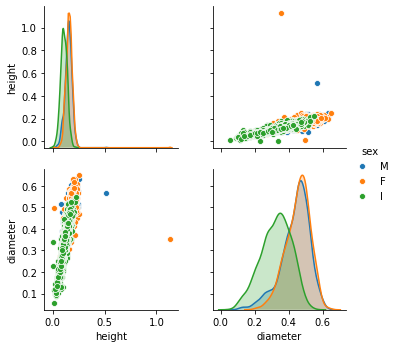

In [63]:
sns.pairplot(data=pd.read_csv('data/abalone.csv')[['height', 'diameter', 'sex']], hue='sex');

In [64]:
bad_indices = shuffle(np.where(data.height > 0.4), random_state=1)[0]
good_indices = list(range(len(data)))

for index in bad_indices: good_indices.remove(index)

bad_indices

array([1417, 2051], dtype=int64)

Выкинем их из данных и попробуем еще раз!

In [65]:
regressor = MLPRegressor(
    hidden_layer_sizes=[20, 20], # два скрытых слоя на 20 нейронов
    activation='relu',
    max_iter=1000, # сколько итераций подгонки
    random_state=1 # для воспроизводимости
)

scores = cross_val_score(
    regressor,
    X=shuffled_X[good_indices],
    y=scaled_target.flatten()[good_indices], # сделаем массив "плоским"
    cv=3,
    scoring='r2'
)

"R2 mean: %.3f, std %.3f" % (scores.mean(), scores.std())

'R2 mean: 0.572, std 0.016'

Метрика улучшилась! Но пока еще недостаточно.

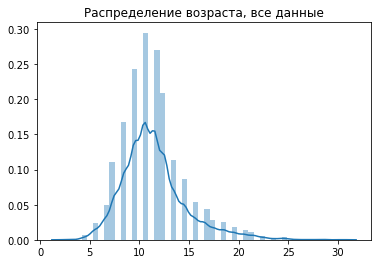

In [66]:
shuffled_X = shuffled_X[good_indices]
shuffled_y = shuffled_y[good_indices]

plt.title('Распределение возраста, все данные');
sns.distplot(shuffled_y);

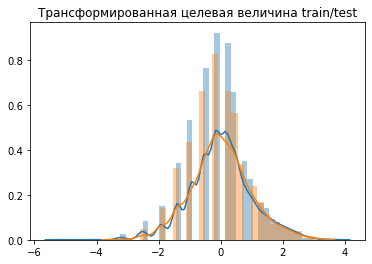

In [67]:
train = int(len(shuffled_y) * 0.8)
test = len(shuffled_y) - train

from sklearn.preprocessing import PowerTransformer
target_processor = PowerTransformer().fit(shuffled_y[:train].reshape(-1, 1))
transformed_y = target_processor.transform(shuffled_y.reshape(-1, 1)).flatten()

plt.title('Трансформированная целевая величина train/test')
sns.distplot(transformed_y[:train]);
sns.distplot(transformed_y[train:]);

Что такое `PowerTransform`? Помните как мы подбирали третью степень для длины и веса? `PowerTransform` подбирает для одной величины степенное преобразование так, чтобы её распределение было как можно более близко к нормальному.

In [68]:
from sklearn.metrics import mean_absolute_error

regressor = MLPRegressor(
    hidden_layer_sizes=[20, 20], 
    activation='relu',
    max_iter=1000, 
    random_state=1 
)

regressor.fit(
    shuffled_X[:train],
    transformed_y[:train]
)

"R2 %.3f, ошибка в возрасте: %.2f, разброс значений возраста %.2f" % (
    r2_score(
        shuffled_y[train:],
        target_processor.inverse_transform(
            regressor.predict(shuffled_X[train:]).reshape(-1, 1)
        )
    ),
    mean_absolute_error(
        shuffled_y[train:],
        target_processor.inverse_transform(
            regressor.predict(shuffled_X[train:]).reshape(-1, 1)
        )
    ),
    shuffled_y[train:].std()
)

'R2 0.597, ошибка в возрасте: 1.43, разброс значений возраста 3.12'

Посмотрим теперь классификацию на датасете Iris.

In [69]:
classifier = MLPClassifier(
    hidden_layer_sizes=[32, 12],
    activation='tanh',
    max_iter=1000,
    random_state=1
)

X_changed = MinMaxScaler(
    feature_range=(-1, 1)
).fit_transform(X)

scores = cross_val_score(
    classifier,
    X=X_changed,
    y=y,
    cv=3,
    scoring='accuracy'
)

In [70]:
"Accuracy mean: %.3f, std %.3f" % (scores.mean(), scores.std())

'Accuracy mean: 0.953, std 0.019'

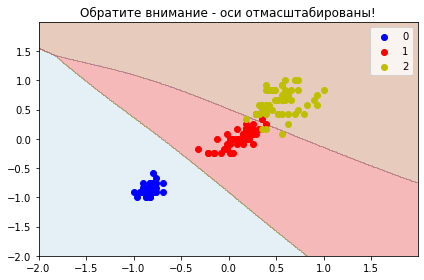

In [71]:
iris_X, iris_y = shuffle(X_changed, y, random_state=1)
classifier.fit(iris_X[:-50], iris_y[:-50])

plt.title("Обратите внимание - оси отмасштабированы!")
plot_decisions(X_changed[:, 0], X_changed[:, 1], y, classifier)

Здесь мы видим, как нейросетью можно разграничить классы датасета Iris.

## Небольшое заключение

Несмотря на то, что сети универсальны, при добавлении одного признака, они требуют в квадрат больше примеров - ввиду своей как раз универсальности. Для табличных данных все же очень хорошо работают и другие алгоритмы в сочетании с `feature engineering`. Его же никто не запрещает использовать и для нейросетей.